Topic:        Challenge Set 1  
Subject:      Explore MTA turnstile data  
Date:         09/24/2018  
Name:         Vitoria Cancado  
Worked with:  Arianna Breslauer, Daniel Hui  

In [4]:
# importing pckgs
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [5]:
#set some option to pandas
# this will help to avoid long printings
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

# Challenge 1
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION).  
These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. 

In [6]:
# ingesting the data and creating the data frame
df2018 = pd.read_csv('turnstile_180616.txt')
df2018.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345


In [7]:
# renaming column
df2018.rename(columns={'EXITS                                                               ':'EXITS'},
              inplace=True)

# Challenge 2
Let's turn this into a time series.

In [8]:
# time series column
df2018['DATE TIME'] = pd.to_datetime(df2018['DATE'] + ' ' + df2018['TIME'])
df2018.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,00:00:00,REGULAR,6649975,2254182,2018-06-09 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,04:00:00,REGULAR,6650004,2254188,2018-06-09 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,08:00:00,REGULAR,6650022,2254209,2018-06-09 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,12:00:00,REGULAR,6650118,2254289,2018-06-09 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/09/2018,16:00:00,REGULAR,6650332,2254345,2018-06-09 16:00:00


# Challenge 3
These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

In [12]:
# Create a mask that selects only the stations that we need
# These are the stations that will be analyzed in our project
station_mask = ((df2018["STATION"] == "GRD CNTRL-42 ST") |
(df2018["STATION"] == "59 ST") |
(df2018["STATION"] == "47-50 STS ROCK")|
(df2018["STATION"] == "LEXINGTON AV/53")|
(df2018["STATION"] == "51 ST")|
(df2018["STATION"] == "42 ST-BRYANT PK")|
(df2018["STATION"] == "77 ST")|
(df2018["STATION"] == "68ST-HUNTER CO")|
(df2018["STATION"] == "LEXINGTON AV/63")|
(df2018["STATION"] == "5 AV/53 ST")|
(df2018["STATION"] == "5 AV/59 ST")|
(df2018["STATION"] == "57 ST")|
(df2018["STATION"] == "5 AVE"))

In [13]:
# create df with data from the stations that we need
entries_df = df2018[station_mask]
# count the number of stations, just to make sure it is right
entries_df['STATION'].nunique()

13

In [14]:
# we have 4 entry values for each turnstile and day
# here we will select the minimum value of entries in a day for a station
entries_df = (entries_df
             .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
            .ENTRIES.first())

In [15]:
entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/09/2018,6649975
1,A002,R051,02-00-00,59 ST,06/10/2018,6650723
2,A002,R051,02-00-00,59 ST,06/11/2018,6651277
3,A002,R051,02-00-00,59 ST,06/12/2018,6652785
4,A002,R051,02-00-00,59 ST,06/13/2018,6654264


In [16]:
# sort values
entries_df.sort_values(['C/A', 'SCP', 'UNIT', 'DATE'], inplace=True, ascending=False)
# remove duplicate entries
entries_df.drop_duplicates(subset=['C/A', 'SCP', 'UNIT', 'DATE', 'STATION'], inplace=True)
entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
2367,R501,R054,00-06-01,5 AVE,06/15/2018,135498035
2366,R501,R054,00-06-01,5 AVE,06/14/2018,135495343
2365,R501,R054,00-06-01,5 AVE,06/13/2018,135492927
2364,R501,R054,00-06-01,5 AVE,06/12/2018,135490397
2363,R501,R054,00-06-01,5 AVE,06/11/2018,135488022


In [17]:
# here we can drop exists and desc values
entries_df = entries_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [18]:
entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
2367,R501,R054,00-06-01,5 AVE,06/15/2018,135498035
2366,R501,R054,00-06-01,5 AVE,06/14/2018,135495343
2365,R501,R054,00-06-01,5 AVE,06/13/2018,135492927
2364,R501,R054,00-06-01,5 AVE,06/12/2018,135490397
2363,R501,R054,00-06-01,5 AVE,06/11/2018,135488022


In [19]:
# create columns with previous date and entries
entries_df[['PREV DATE', 'PREV ENTRIES']] = (entries_df
                                                        .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                        .transform(lambda grp: grp.shift(1)))

In [20]:
# Drop the rows for the earliest date in the df
# doing this we will eliminate NaN values
entries_df.dropna(subset=['PREV DATE'], axis=0, inplace=True)

In [21]:
# Now we need to pay attention to the dataframe
# There are some PREV ENTRIES that are smaller than ENTRIES
entries_df[entries_df['ENTRIES'] < entries_df['PREV ENTRIES']].head()
#some entries are counting reversely

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV DATE,PREV ENTRIES
2366,R501,R054,00-06-01,5 AVE,06/14/2018,135495343,06/15/2018,1.355e+08
2365,R501,R054,00-06-01,5 AVE,06/13/2018,135492927,06/14/2018,1.355e+08
2364,R501,R054,00-06-01,5 AVE,06/12/2018,135490397,06/13/2018,1.355e+08
2363,R501,R054,00-06-01,5 AVE,06/11/2018,135488022,06/12/2018,1.355e+08
2362,R501,R054,00-06-01,5 AVE,06/10/2018,135486976,06/11/2018,1.355e+08


In [22]:
# counting how many stations are reversed
(entries_df[entries_df['ENTRIES'] < entries_df['PREV ENTRIES']]
 .groupby(['C/A', 'UNIT', 'SCP', 'STATION'])
 .size())

C/A   UNIT  SCP       STATION   
A002  R051  02-00-00  59 ST         6
            02-00-01  59 ST         6
            02-03-00  59 ST         6
            02-03-01  59 ST         6
            02-03-02  59 ST         6
            02-03-03  59 ST         6
            02-03-04  59 ST         6
            02-03-05  59 ST         6
            02-03-06  59 ST         6
            02-05-00  59 ST         2
            02-06-00  59 ST         6
A006  R079  00-00-00  5 AV/59 ST    6
                                   ..
R248  R178  00-00-06  77 ST         6
            00-00-07  77 ST         6
R501  R054  00-00-00  5 AVE         6
            00-00-01  5 AVE         6
            00-00-02  5 AVE         6
            00-00-03  5 AVE         6
            00-00-04  5 AVE         6
            00-00-05  5 AVE         6
            00-00-06  5 AVE         6
            00-00-07  5 AVE         6
            00-06-00  5 AVE         6
            00-06-01  5 AVE         6
Length: 325, dtyp

In [24]:
# Now let's find a way to overcome this problem
def get_daily_counts(row, max_counter):
    '''
    This function will count the number of entries by day for each station.
    It will handle those stations that are counting backwards.
    '''
    # set a counter, if the counter is negative, the entries are being counted in reverse order
    counter = row['ENTRIES'] - row['PREV ENTRIES']
    # define how to handle this error
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row['ENTRIES'], row['PRE ENTRIES'])
        counter = min(row['ENTRIES'], row['PRE ENTRIES'])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits

In [25]:
_ = entries_df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [26]:
entries_df['DAILY ENTRIES'] = (entries_df
                               .apply(get_daily_counts, axis=1, max_counter=1000000))

In [27]:
entries_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV DATE,PREV ENTRIES,DAILY ENTRIES
2366,R501,R054,00-06-01,5 AVE,06/14/2018,135495343,06/15/2018,1.355e+08,2692.0
2365,R501,R054,00-06-01,5 AVE,06/13/2018,135492927,06/14/2018,1.355e+08,2416.0
2364,R501,R054,00-06-01,5 AVE,06/12/2018,135490397,06/13/2018,1.355e+08,2530.0
2363,R501,R054,00-06-01,5 AVE,06/11/2018,135488022,06/12/2018,1.355e+08,2375.0
2362,R501,R054,00-06-01,5 AVE,06/10/2018,135486976,06/11/2018,1.355e+08,1046.0


# Challenge 4
We will plot the daily time series for a turnstile.

In [28]:
# extract a list of dates and a list of entries
date = list(entries_df['DATE'])
entries = list(entries_df['DAILY ENTRIES'])

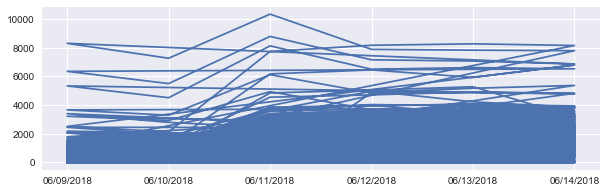

In [29]:
# set plot size
plt.figure(figsize=(10,3))
# set plot axis
plt.plot(date, entries)

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,u'Daily Entries')

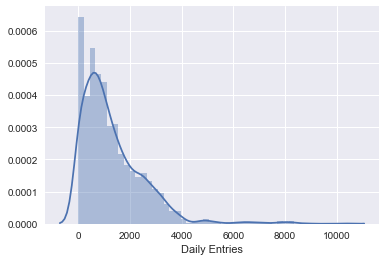

In [30]:
sns.distplot(entries)
plt.xlabel('Daily Entries')

# Challenge 5
So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo.  
There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.  
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [32]:
turnstile = (entries_df
                   .groupby(['C/A', 'UNIT', 'STATION', 'DATE'])[['DAILY ENTRIES']]
                   .sum().reset_index())

In [33]:
turnstile.head()

,C/A,UNIT,STATION,DATE,DAILY ENTRIES
0,A002,R051,59 ST,06/09/2018,7714.0
1,A002,R051,59 ST,06/10/2018,6337.0
2,A002,R051,59 ST,06/11/2018,13107.0
3,A002,R051,59 ST,06/12/2018,13659.0
4,A002,R051,59 ST,06/13/2018,13453.0


In [ ]:
# turnstile_count = (entries_df
#                    .groupby(['C/A', 'UNIT', 'STATION', 'DATE'])['SCP']
#                    .nunique().reset_index()
#                   .sort_values(by='SCP', ascending=False))

# Challenge 6
Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [36]:
entries_df['DATE'] = pd.to_datetime(entries_df['DATE'])

In [38]:
station = (entries_df
                   .groupby(['STATION', 'DATE'])[['DAILY ENTRIES']]
                   .sum().reset_index())
#                   .sort_values(by='SCP', ascending=False))

In [39]:
station.head()

,STATION,DATE,DAILY ENTRIES
0,42 ST-BRYANT PK,2018-06-09,15071.0
1,42 ST-BRYANT PK,2018-06-10,11893.0
2,42 ST-BRYANT PK,2018-06-11,43406.0
3,42 ST-BRYANT PK,2018-06-12,47266.0
4,42 ST-BRYANT PK,2018-06-13,47019.0


# Challenge 7
Plot the time series for a station.

In [44]:
# select a station to plot the data
bryant = station[station['STATION'] == '42 ST-BRYANT PK']

Text(0.5,1,u'Daily entries 42 ST-BRYANT PK')

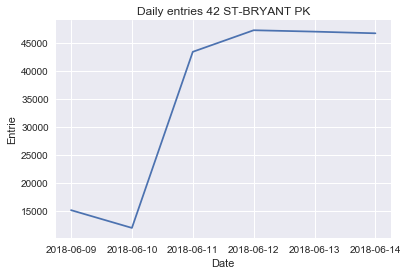

In [47]:
plt.plot(bryant['DATE'], bryant['DAILY ENTRIES'])
plt.xlabel('Date')
plt.ylabel('Entrie')
plt.title('Daily entries 42 ST-BRYANT PK')

# Challenge 8
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [48]:
bryant['WEEK DAY'] = bryant['DATE'].dt.day_name()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
bryant_week_count = (bryant
                 .groupby(['WEEK DAY'])['DAILY ENTRIES']
                 .sum()
                 .reset_index())

In [50]:
bryant_week_count_list = bryant_week_count.values.tolist()

In [51]:
bryant_week_count_list

[['Monday', 43406.0],
 ['Saturday', 15071.0],
 ['Sunday', 11893.0],
 ['Thursday', 46720.0],
 ['Tuesday', 47266.0],
 ['Wednesday', 47019.0]]

# Challenge 9
Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [52]:
station['WEEK DAY'] = station['DATE'].dt.day_name()

In [57]:
week_count = (station
                 .groupby(['STATION','WEEK DAY'])['DAILY ENTRIES']
                 .sum()
                 .reset_index())

In [62]:
week_count.sort_values(by=['DAILY ENTRIES'], ascending=False)

,STATION,WEEK DAY,DAILY ENTRIES
65,GRD CNTRL-42 ST,Wednesday,168785.0
63,GRD CNTRL-42 ST,Thursday,166864.0
64,GRD CNTRL-42 ST,Tuesday,165245.0
60,GRD CNTRL-42 ST,Monday,158070.0
45,59 ST,Thursday,73368.0
46,59 ST,Tuesday,72316.0
47,59 ST,Wednesday,72133.0
42,59 ST,Monday,68568.0
11,47-50 STS ROCK,Wednesday,65561.0
10,47-50 STS ROCK,Tuesday,63796.0


# Challenge 10
Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

In [84]:
total_ridership_counts = (week_count
                 .groupby(['STATION'])['DAILY ENTRIES']
                 .sum()
                 .reset_index())

In [73]:
total_ridership_counts = total_ridership_counts.values.tolist()

In [85]:
total_ridership_counts

,STATION,DAILY ENTRIES
0,42 ST-BRYANT PK,211375.0
1,47-50 STS ROCK,283827.0
2,5 AV/53 ST,126261.0
3,5 AV/59 ST,89327.0
4,5 AVE,65400.0
5,51 ST,107745.0
6,57 ST,63317.0
7,59 ST,362892.0
8,68ST-HUNTER CO,102538.0
9,77 ST,161659.0


Text(0,0.5,u'Number of Stations')

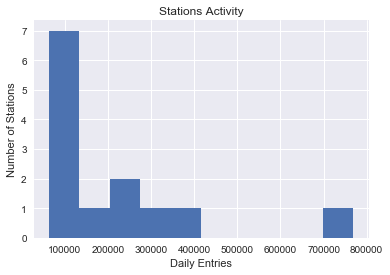

In [95]:
plt.hist(total_ridership_counts['DAILY ENTRIES'])
plt.title('Stations Activity')
plt.xlabel('Daily Entries')
plt.ylabel('Number of Stations')